In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cross_validation import train_test_split
import string

/home/suraj/.virtualenvs/tf/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_path = '../data/titanic/'

In [3]:
train = pd.read_csv( os.path.join(data_path, 'train.csv') )
test = pd.read_csv( os.path.join(data_path, 'test.csv') )
sub = pd.read_csv( os.path.join(data_path, 'gender_submission.csv') )

In [4]:
test['Fare'][152] = train['Fare'].mean()

/home/suraj/.virtualenvs/tf/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train = train.drop('Ticket', axis=1)
train = train.drop('Embarked', axis=1)
train = train.drop('PassengerId', axis=1)
train = train.drop('Cabin', axis=1)
train['FamilySize'] = train['SibSp'] + train['Parch']
train['Total Fare'] = (train['FamilySize']+1) * train['Fare']
train = train.drop('Fare', axis=1)


test_pID = test['PassengerId']
test = test.drop('Ticket', axis=1)
test = test.drop('Embarked', axis=1)
test = test.drop('PassengerId', axis=1)
test = test.drop('Cabin', axis=1)
test['FamilySize'] = test['SibSp'] + test['Parch']
test['Total Fare'] = (test['FamilySize']+1) * test['Fare']
test = test.drop('Fare', axis=1)


In [7]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilySize,Total Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,14.5000
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,142.5666
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,106.2000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,8.0500


In [8]:
title_list = ['Mr', 'Mrs', 'Dr', 'Miss', 'Master', 'Rev', 'Ms', 'Capt', 'Sir', 'Major',\
              'Don', 'Mlle', 'Mme', 'Jonkheer', 'Countess', 'Col']

In [9]:
# Reference : https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

def title_in_name(name, target_list):
    for title in title_list:
        if name.find(title) != -1:
            return title
    print(name)
    return np.nan


In [10]:
train['Title'] = train['Name'].map(lambda x: title_in_name(x, title_list))
train = train.drop('Name', axis=1)

test['Title'] = test['Name'].map(lambda x: title_in_name(x, title_list))
test = test.drop('Name', axis=1)


In [11]:
#train.head()
test.head()

,Pclass,Sex,Age,SibSp,Parch,FamilySize,Total Fare,Title
0,3,male,34.5,0,0,0,7.8292,Mr
1,3,female,47.0,1,0,1,14.0000,Mr
2,2,male,62.0,0,0,0,9.6875,Mr
3,3,male,27.0,0,0,0,8.6625,Mr
4,3,female,22.0,1,1,2,36.8625,Mr


In [12]:
def replace_titles(x):
    title = x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme', 'Mme.']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms', 'Mlle.', 'Ms.']:
        return 'Miss'
    elif title == 'Dr':
        if x['Sex'] == 'male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
    
train['Title'] = train.apply(replace_titles, axis=1)
test['Title'] = test.apply(replace_titles, axis=1)

In [13]:
train['Sex'] = (train['Sex'] == 'male').astype('int')
test['Sex'] = (test['Sex'] == 'male').astype('int')

In [14]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Title', 'Total Fare']]
Y = train[['Survived']]

X_test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Title', 'Total Fare']]


In [15]:
test_split = 0.1
X_train, X_CV, Y_train, Y_CV = train_test_split(X, Y, test_size=test_split, random_state=42)


print('Train : ')
print(X_train.shape)
print(Y_train.shape)
print('CV : ')
print(X_CV.shape)
print(Y_CV.shape)

Train : 
(801, 8)
(801, 1)
CV : 
(90, 8)
(90, 1)


In [16]:
def get_means_age(df):
    sum_val={'Mr':0, 'Mrs':0, 'Miss':0, 'Master':0}
    count_val={'Mr':0, 'Mrs':0, 'Miss':0, 'Master':0}
    mean_val={'Mr':0, 'Mrs':0, 'Miss':0, 'Master':0}
    
    for _, row in df.iterrows():
        if not np.isnan(row['Age']):
            sum_val[row['Title']] += row['Age']
            count_val[row['Title']] += 1
    
    for key in sum_val.keys():
        mean_val[key] = sum_val[key] / count_val[key]
        
    return mean_val

mean_ages = get_means_age(train)

def replace_nan_ages(x):
    if np.isnan(x['Age']):
        x['Age'] = mean_ages[x['Title']]
    return x




In [17]:
X_train = X_train.apply(replace_nan_ages, axis=1)
X_CV = X_CV.apply(replace_nan_ages, axis=1)
X_test = X_test.apply(replace_nan_ages, axis=1)


In [18]:
title = {'Mr':0, 'Master':1, 'Miss':2, 'Mrs':3}

def title2num(x):
    return title[ x['Title'] ]

X_train['Title'] = X_train.apply(title2num, axis=1)
X_CV['Title'] = X_CV.apply(title2num, axis=1)
X_test['Title'] = X_test.apply(title2num, axis=1)

In [19]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_CV = np.array(X_CV)
Y_CV = np.array(Y_CV)

X_test = np.array(X_test)

Y_train =  Y_train.ravel()
Y_CV =  Y_CV.ravel()

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

/home/suraj/.virtualenvs/tf/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
clf = RandomForestClassifier(n_estimators=10000, max_depth=None, random_state=0, verbose=1)

In [36]:
clf.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   11.6s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [37]:
print( np.mean(cross_val_score(clf, X_train, Y_train, cv=10, scoring='f1_macro')) )

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.6s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.9s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Done 10000 out o

0.8027409514264748


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.3s finished


In [38]:
clf.feature_importances_

array([0.0851401 , 0.21702491, 0.2329914 , 0.03391896, 0.02109799,
       0.05119214, 0.07226042, 0.28637407])

In [39]:
Y_pred_CV = clf.predict(X_CV)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.4s finished


In [40]:
print(metrics.classification_report(Y_CV, Y_pred_CV))

             precision    recall  f1-score   support

          0       0.88      0.83      0.86        54
          1       0.77      0.83      0.80        36

avg / total       0.84      0.83      0.83        90



[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    1.5s finished


Accuracy :  0.8333333333333334
AUC       :  0.8333333333333334
F1 score  :  0.8
Confusion Matrix : 
[[45  9]
 [ 6 30]]


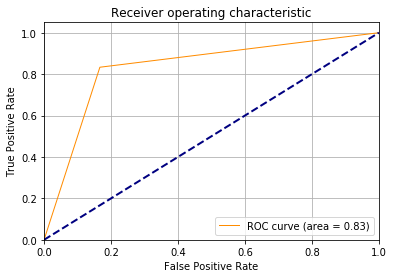

In [41]:
print('Accuracy : ', clf.score(X_CV, Y_CV))

fpr, tpr, thresholds = metrics.roc_curve(Y_CV, Y_pred_CV, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print('AUC       : ', roc_auc)

f1 = metrics.f1_score(Y_CV, Y_pred_CV, average='binary')
print('F1 score  : ', f1)

cm = metrics.confusion_matrix(Y_CV, Y_pred_CV)
print('Confusion Matrix : ')
print(cm)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()

# Making Prediction

In [42]:
prediction = clf.predict(X_test)

[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    2.0s finished


In [43]:
id_list = np.array(test_pID)

In [44]:
submission = {'PassengerId': id_list,
              'Survived': prediction}

In [45]:
df = pd.DataFrame.from_dict(submission)

In [48]:
df.to_csv('submission.csv', index=False)